<a href="https://colab.research.google.com/github/CamiLopez15/DeepLearning/blob/main/Proyecto_2_Detecci%C3%B3n_de_enfermedades_en_hojas_Lopez_y_Jara1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Descomprimir el archivo zip cargado en Google Colab
import zipfile
import os

# Ruta al archivo ZIP cargado
zip_file_path = '/archive.zip'  # Cambia el nombre si es diferente

# Ruta de destino para extraer los archivos
extract_dir = '/plantdisease'

# Descomprimir el archivo
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"✔️ Archivos extraídos en: {extract_dir}")


✔️ Archivos extraídos en: /plantdisease


In [ ]:
import os
import shutil
import random

# Ruta original con todas las clases
source_dir = '/plantdisease/PlantVillage'

# Nueva ruta para almacenar las imágenes de prueba
test_samples_dir = '/plantdisease/test_samples'

# Crear carpeta de destino si no existe
if not os.path.exists(test_samples_dir):
    os.makedirs(test_samples_dir)

# Recorrer cada subcarpeta (clase) en la carpeta de entrenamiento
for class_name in os.listdir(source_dir):
    class_path = os.path.join(source_dir, class_name)

    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        selected_images = random.sample(images, min(3, len(images)))

        dest_class_path = os.path.join(test_samples_dir, class_name)
        os.makedirs(dest_class_path, exist_ok=True)

        for img_name in selected_images:
            src_img_path = os.path.join(class_path, img_name)
            dest_img_path = os.path.join(dest_class_path, img_name)
            shutil.move(src_img_path, dest_img_path)

print("✔️ Selección y traslado de imágenes de prueba completado.")


✔️ Selección y traslado de imágenes de prueba completado.


Found 15981 images belonging to 10 classes.
Found 15981 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
499/499 ━━━━━━━━━━━━━━━━━━━━ 229s 443ms/step - accuracy: 0.4164 - loss: 1.6878 - val_accuracy: 0.6613 - val_loss: 1.0124
Epoch 2/25
  1/499 ━━━━━━━━━━━━━━━━━━━━ 33s 67ms/step - accuracy: 0.6250 - loss: 0.7492

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


499/499 ━━━━━━━━━━━━━━━━━━━━ 44s 88ms/step - accuracy: 0.6250 - loss: 0.7492 - val_accuracy: 0.5831 - val_loss: 1.3854
Epoch 3/25
499/499 ━━━━━━━━━━━━━━━━━━━━ 266s 430ms/step - accuracy: 0.7256 - loss: 0.7968 - val_accuracy: 0.7905 - val_loss: 0.5878
Epoch 4/25
499/499 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - accuracy: 0.8125 - loss: 0.6806 - val_accuracy: 0.7812 - val_loss: 0.6245
Epoch 5/25
499/499 ━━━━━━━━━━━━━━━━━━━━ 262s 480ms/step - accuracy: 0.7907 - loss: 0.5976 - val_accuracy: 0.7876 - val_loss: 0.6347
Epoch 6/25
499/499 ━━━━━━━━━━━━━━━━━━━━ 24s 47ms/step - accuracy: 0.7812 - loss: 0.5382 - val_accuracy: 0.7583 - val_loss: 0.7529
Epoch 7/25
499/499 ━━━━━━━━━━━━━━━━━━━━ 262s 525ms/step - accuracy: 0.8277 - loss: 0.5051 - val_accuracy: 0.7901 - val_loss: 0.7251
Epoch 8/25
499/499 ━━━━━━━━━━━━━━━━━━━━ 24s 48ms/step - accuracy: 0.7500 - loss: 0.5081 - val_accuracy: 0.8349 - val_loss: 0.5300
Epoch 9/25
499/499 ━━━━━━━━━━━━━━━━━━━━ 264s 528ms/step - accuracy: 0.8453 - loss: 0.4540 - val

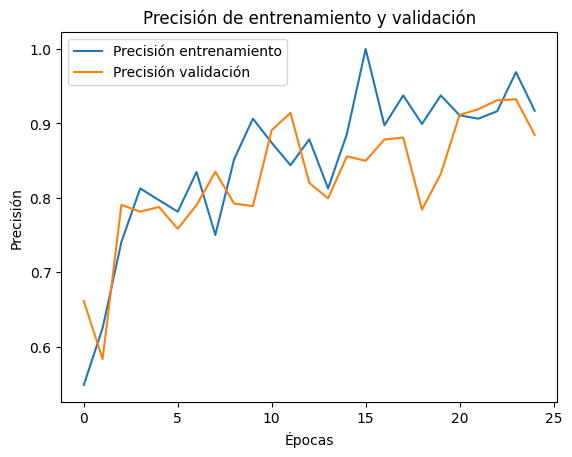

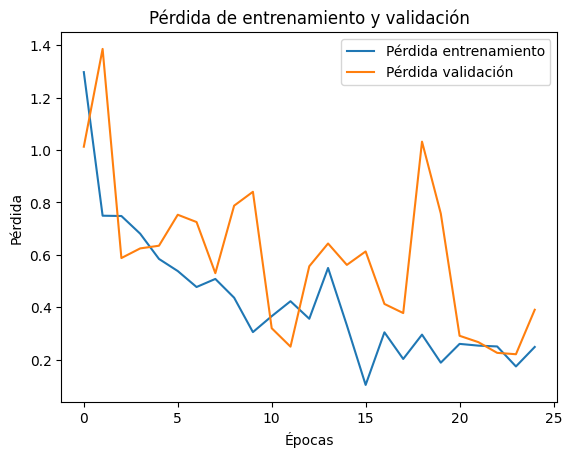

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Directorio de entrenamiento y validación
train_dir = '/plantdisease/PlantVillage'
test_dir = '/plantdisease/PlantVillage'  # Para validación durante entrenamiento

# Crear generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Modelo CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilación del modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamiento (más épocas)
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,  # AUMENTADO para mejor precisión
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size)

# Evaluación
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f"🔎 Precisión validación: {validation_accuracy:.4f}")
print(f"🔎 Pérdida validación: {validation_loss:.4f}")

# Gráficas
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión de entrenamiento y validación')
plt.show()

plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida de entrenamiento y validación')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


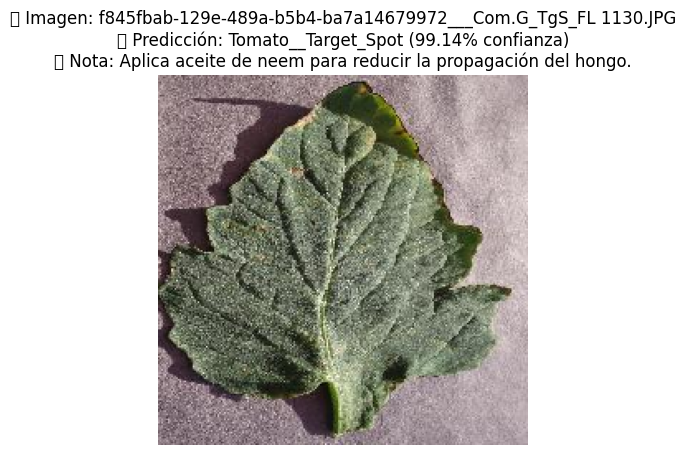

📸 Nombre del archivo: f845fbab-129e-489a-b5b4-ba7a14679972___Com.G_TgS_FL 1130.JPG
🧠 Enfermedad detectada: Tomato__Target_Spot (99.14% confianza)
🌿 Nota: Aplica aceite de neem para reducir la propagación del hongo.


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random

# Ruta al set de prueba
test_path = '/plantdisease/test_samples'

# Obtener todas las rutas de imágenes
image_paths = []
for root, dirs, files in os.walk(test_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_paths.append(os.path.join(root, file))

# Elegir una imagen aleatoria
img_path = random.choice(image_paths)
img_filename = os.path.basename(img_path)  # Extrae solo el nombre del archivo

# Cargar la imagen
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)

# Filtro de reducción de ruido
img_array_denoised = cv2.bilateralFilter(img_array.astype(np.uint8), d=9, sigmaColor=25, sigmaSpace=25)

# Preprocesamiento
img_array_denoised = np.expand_dims(img_array_denoised, axis=0)
img_array_denoised = img_array_denoised / 255.0

# Predicción
predicciones = model.predict(img_array_denoised)
clase_predicha = np.argmax(predicciones, axis=1)
probabilidad = np.max(predicciones) * 100  # Confianza en porcentaje

# Diccionario de clases
clases = train_generator.class_indices
clases = {v: k for k, v in clases.items()}

# Diccionario de remedios naturales
remedios_naturales = {
    "Tomato_Bacterial_spot": "Aplica una solución de bicarbonato de sodio con agua en las hojas.",
    "Tomato_Early_blight": "Usa extracto de ajo o una infusión de cola de caballo para rociar las hojas.",
    "Tomato_Late_blight": "Aplica una mezcla de leche diluida en agua (1:10) como fungicida natural.",
    "Tomato_Leaf_Mold": "Mejora la ventilación de las plantas y usa una solución de vinagre con agua.",
    "Tomato_Septoria_leaf_spot": "Prepara un té de manzanilla y úsalo como spray antifúngico.",
    "Tomato_Spider_mites_Two_spotted_spider_mite": "Rocía agua con jabón potásico para eliminar los ácaros.",
    "Tomato__Target_Spot": "Aplica aceite de neem para reducir la propagación del hongo.",
    "Tomato__Tomato_YellowLeaf__Curl_Virus": "No tiene cura, pero puedes controlar vectores como la mosca blanca.",
    "Tomato__Tomato_mosaic_virus": "Evita la propagación eliminando hojas infectadas y desinfectando herramientas.",
    "Tomato_healthy": "Tu planta está sana. Continúa con los cuidados normales. 🌿"
}

# Resultado
enfermedad_detectada = clases[clase_predicha[0]]
remedio = remedios_naturales.get(enfermedad_detectada, "No se encontró información para esta enfermedad.")

# Mostrar imagen y resultados
plt.imshow(img)
plt.title(f"📸 Imagen: {img_filename}\n🧠 Predicción: {enfermedad_detectada} ({probabilidad:.2f}% confianza)\n🌿 Nota: {remedio}")
plt.axis('off')
plt.show()

# Imprimir en consola también
print(f"📸 Nombre del archivo: {img_filename}")
print(f"🧠 Enfermedad detectada: {enfermedad_detectada} ({probabilidad:.2f}% confianza)")
print(f"🌿 Nota: {remedio}")
